# Basic visualization of time series data

In [70]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')

In [71]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 auto_adjust=False,
                 progress=False)
df['simple_rtn'] = df['Adj Close'].pct_change()
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,simple_rtn
Date,,,,,,,
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.486771,21116200,-0.012452
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.883499,20813700,0.002585
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.480438,21634100,-0.009118
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.909210,27746500,0.015928
2020-01-09,161.839996,162.220001,161.029999,162.089996,156.844482,21385000,0.012493
...,...,...,...,...,...,...,...
2023-06-20,339.309998,342.079987,335.859985,338.049988,338.049988,26375400,-0.012503
2023-06-21,336.369995,337.730011,332.070007,333.559998,333.559998,25117800,-0.013282
2023-06-22,334.119995,340.119995,333.339996,339.709991,339.709991,23556800,0.018437


<Axes: title={'center': 'MSFT stock in 2020'}, xlabel='Date'>

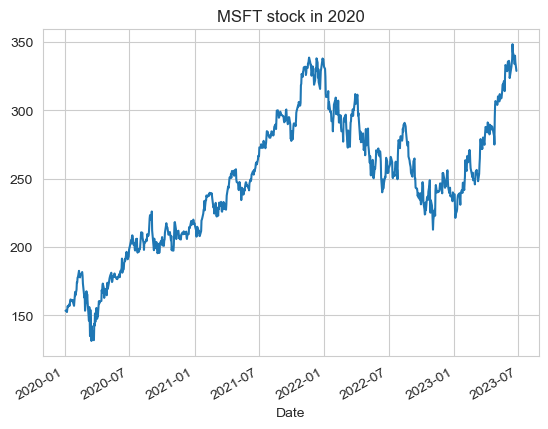

In [72]:
df['Adj Close'].plot(title='MSFT stock in 2020')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

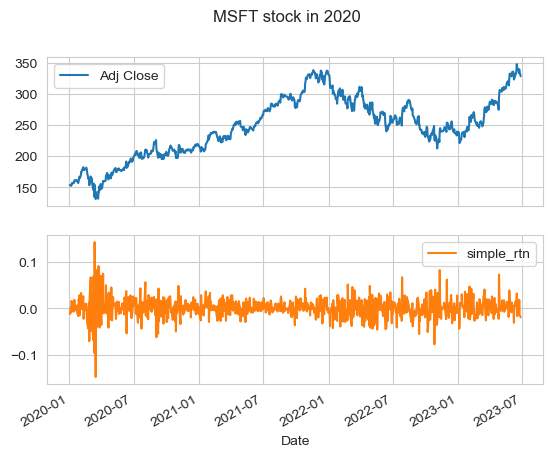

In [73]:
(
    df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True, sharex=True, title="MSFT stock in 2020")
)

In [74]:
import matplotlib.pyplot as plt

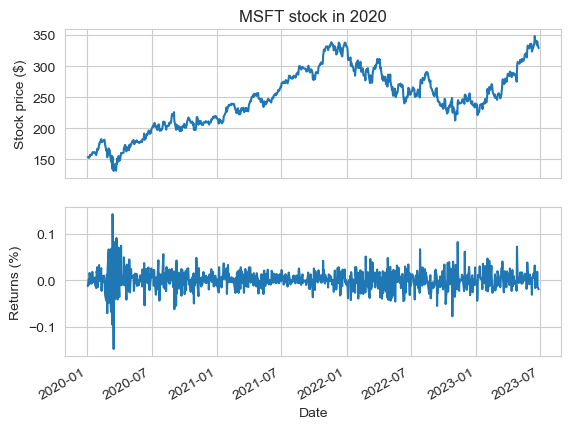

In [75]:
fig, ax = plt.subplots(2, 1, sharex=True)
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT stock in 2020", ylabel="Stock price ($)")

df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Returns (%)")
plt.show()

In [76]:
df['Adj Close'].plot(title='MSFT stock in 2020', backend='plotly')

# Visualizing seasonal patterns

In [77]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns 

In [78]:
nasdaqdatalink.ApiConfig.api_key = 'hbwVh8xyxkjEKo8D1P8c'

<Axes: title={'center': 'Unemployment rate in years 2014-2019'}, xlabel='Date'>

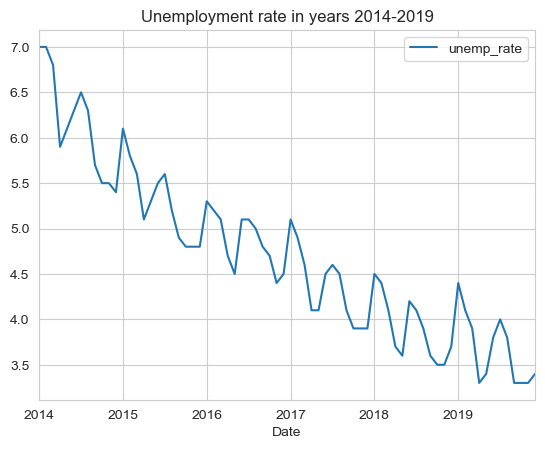

In [79]:
df = (
    nasdaqdatalink.get(dataset='FRED/UNRATENSA',
                                     start_date='2014-01-01',
                                     end_date='2019-12-31')
    .rename(columns={'Value': 'unemp_rate'})
)
df.plot(title="Unemployment rate in years 2014-2019")

In [80]:
df['year'] = df.index.year
df['month'] = df.index.strftime('%b')

Text(0.5, 1.0, 'Unemployment rate - Seasonal plot')

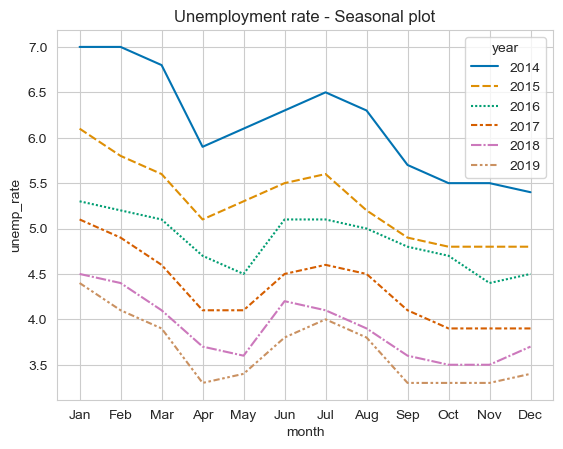

In [81]:
sns.lineplot(data=df,
             x='month',
             y='unemp_rate',
             hue='year',
             style='year',
             legend='full',
             palette='colorblind')
plt.title('Unemployment rate - Seasonal plot')

In [82]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

Text(0.5, 1.0, 'Unemployment rate - Month plot')

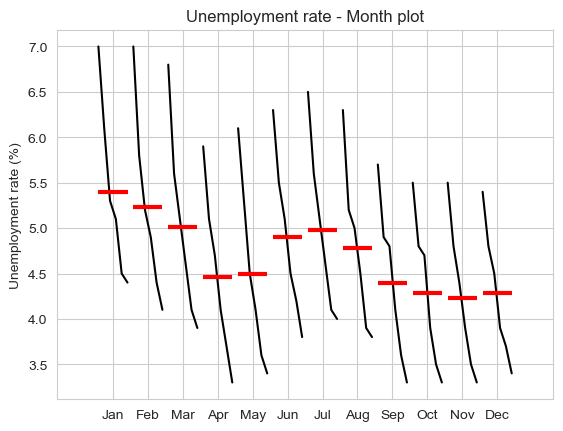

In [83]:
month_plot(df['unemp_rate'], ylabel='Unemployment rate (%)')
plt.title('Unemployment rate - Month plot')

Text(0.5, 1.0, 'Unemployment rate - Quarter plot')

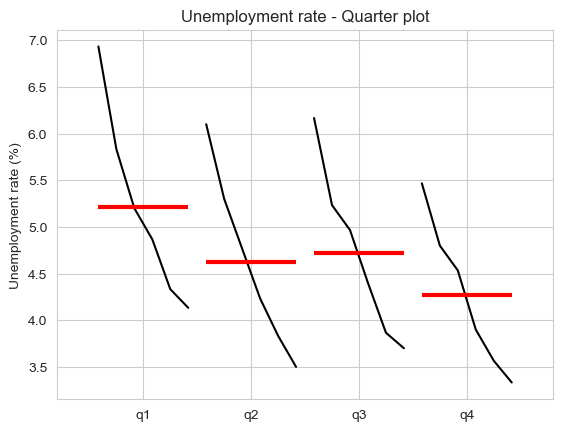

In [84]:
quarter_plot(df['unemp_rate'].resample('Q').mean(), ylabel='Unemployment rate (%)')
plt.title('Unemployment rate - Quarter plot')

In [85]:
fig = px.line_polar(df, r="unemp_rate",
              theta="month",
              color="year",
              line_close=True,
              title="Unemployment rate - Polar seasonal plot",
              width=600, height=500,
              range_r=[3, 7])
fig.show()

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/plotly/ex

# Creating interactive visualizations

In [86]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh
cf.go_offline()
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [87]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust=False,
                 progress=False)
df['simple_rtn'] = df['Adj Close'].pct_change()
df = df.loc[:, ['Adj Close', 'simple_rtn']].dropna()
df = df.dropna()
df

,Adj Close,simple_rtn
Date,,
2020-01-03,153.486771,-0.012452
2020-01-06,153.883514,0.002585
2020-01-07,152.480408,-0.009118
2020-01-08,154.909180,0.015928
2020-01-09,156.844467,0.012493
...,...,...
2020-12-23,216.133026,-0.013039
2020-12-24,217.824783,0.007827
2020-12-28,219.985916,0.009921


In [88]:
df.iplot(subplots=True, 
         shape=(2, 1),
         shared_xaxes=True,
         title='MSFT time series')

In [89]:
df["Adj Close"].plot_bokeh(kind="line", rangetool=True, title="MSFT time series")

Column(id='2194', ...)

In [90]:
fig = px.line(data_frame=df,
              y="Adj Close",
              title="MSFT time series")
fig.show()

In [91]:
from datetime import date


In [92]:
selected_date_1 = date(2020, 2, 19)
selected_date_2 = date(2020, 3, 23)

first_annotation = {
    "x": selected_date_1,
    "y": df.query(f"index == '{selected_date_1}'")["Adj Close"].squeeze(),
    "arrowhead": 5,
    "text": "COVID decline starting",
    "font": {"size": 15, "color": "red"}
}

second_annotation = {
    "x": selected_date_2,
    "y": df.query(f"index == '{selected_date_2}'")["Adj Close"].squeeze(),
    "arrowhead": 5,
    "text": "COVID recovery starting",
    "font": {"size": 15, "color": "green"},
    "ax": 150,
    "ay": 10
}

In [93]:
fig.update_layout(
    {"annotations": [first_annotation, second_annotation]}
)
fig.show()

# Creating a candlestick schar

In [94]:
import pandas as pd
import yfinance as yf

In [101]:
df = yf.download("MSFT",
                 start="2018-01-01",
                 end='2018-12-31',
                 progress=True,
                 auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [102]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

In [109]:
qf = cf.QuantFig(
    df, title="Microsoft's Stock Price",
    legend='best', name="Microsoft's stock price in 2018"
)

In [110]:
qf.add_volume()
qf.add_sma(periods=20, column='Close', color='red')
qf.add_ema(periods=20, color='green')


In [111]:
qf.iplot()

In [112]:
import plotly.graph_objects as go
import mplfinance as mpf

In [113]:
fig = go.Figure(data=go.Candlestick(x=df.index,
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close']))
fig.update_layout(title='Microsoft stock price in 2018',
                  yaxis_title='Price ($)')
fig.show()

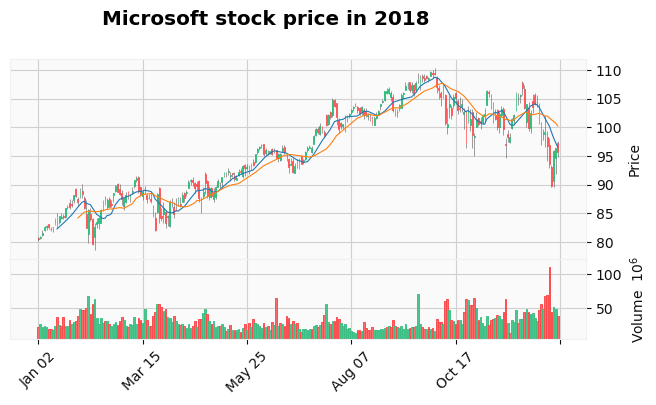

In [115]:
mpf.plot(df, type='candle', 
         mav=(10, 20),
         volume=True,
         style='yahoo',
         title='Microsoft stock price in 2018',
         figsize=(8, 4))